#### A5 – FEATURE EXTRACTION PART 1 OF 3: IMAGE SEGMENTATION

Andeo, Lovely\
2020-05405\
FX-2

**Short Exercise**

First is to input all the necesssary libraries and packages needed.

In [3]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib.image import imread
from skimage.io import imread, imshow

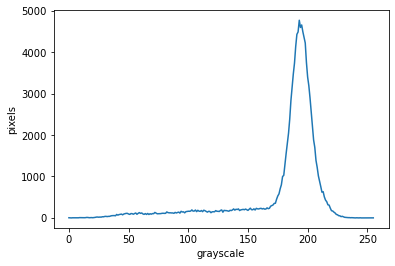

In [9]:
# Loading the grayscale image
I = Image.open('cropped_grayscale_check.jpg').convert('L')

# Calculating the histogram
count, cells = I.histogram(), list(range(256)) # returns list of pixel counts for each intensity level

# Displaying the histogram
plt.plot(cells, count)
plt.xlabel('grayscale')
plt.ylabel('pixels')
plt.show()


Segmenting the regions of interest by setting a threshold

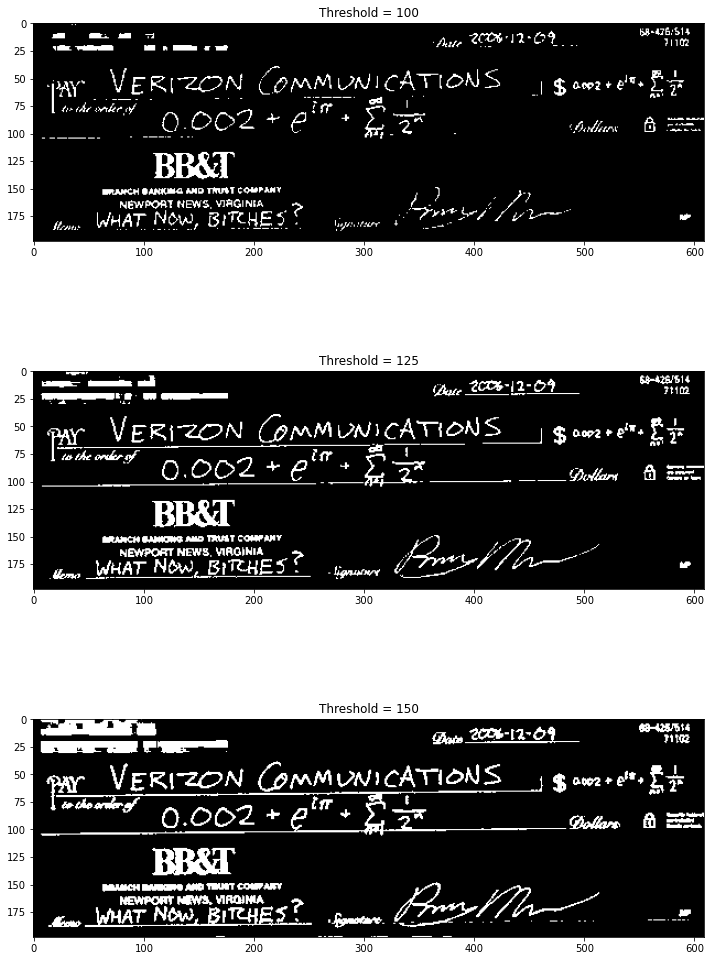

In [12]:
# Defining a list of threshold values to test
thresholds = [100, 125, 150]

# Creating a figure with subplots for each thresholded image
fig, axes = plt.subplots(len(thresholds), 1, figsize=(10, 15))

# Looping over the threshold values and display the thresholded images
for i, t in enumerate(thresholds):
    # Thresholding the image
    BW = np.array(I) < t
    
    # Displaying the thresholded image
    axes[i].imshow(BW, cmap='gray')
    axes[i].set_title('Threshold = {}'.format(t))

plt.tight_layout()
plt.show()


**Parametric vs Non-Parametric Probability Distribution Estimation**
1. Capture or download a digital image of a 3D object with parts that have single color (e.g. colored mugs, skin, NIPS or Skittles candy, colored paper, brightly colored bottles, etc.).
2. Crop a monochromatic region of interest in the scene.
3. Transform color RGB into normalized chromaticity coordinates rgI.
4. Parametric segmentation – derive the Gaussian PDF in the r and g values separately of the
ROI and segment the whole image.
5. Non-parametric segmentation – Obtain the 2D histogram of the ROI. To test if your histogram is correct, compare the location of the peaks with the rg chromaticity diagram in Figure 6. Justify your results. Use the histogram itself to segment the image using histogram backprojection.
6. In your results and discussion, compare the outcomes of the two techniques.

Observe the distibution of the Red and Green color space

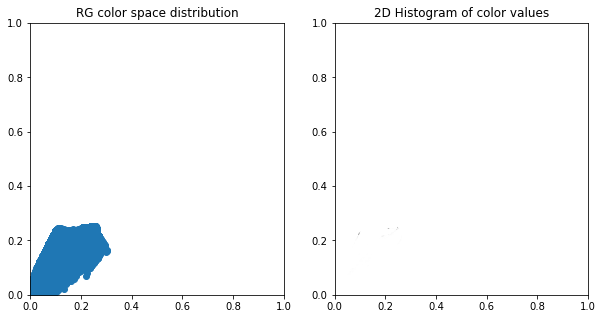

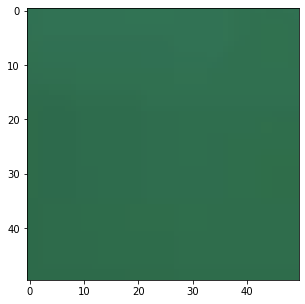

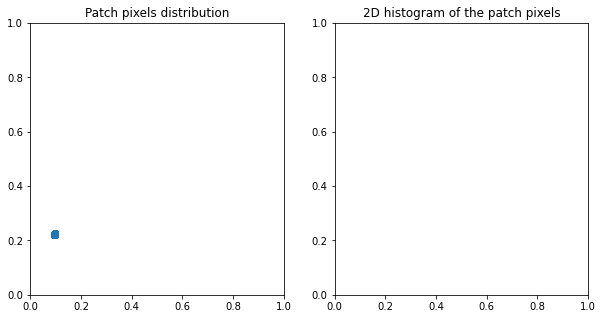

In [23]:
image = imread('Emma.png')
patch = image[500:550,600:650,:]

# Load the image
img = Image.fromarray(image)

# Normalize the image
paint_R = image[:,:,0]*1.0/image.sum(axis=2)
paint_G = image[:,:,1]*1.0/image.sum(axis=2)

# Scatter plot of the image pixels
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axs[0].scatter(paint_R.flatten(),paint_G.flatten())
axs[0].set_xlim(0,1)
axs[0].set_ylim(0,1)
axs[0].set_title('RG color space distribution')
# 2D histogram of the image pixels
axs[1].hist2d(paint_R.flatten(), paint_G.flatten(), bins=100,cmap='binary')
axs[1].set_xlim(0,1)
axs[1].set_ylim(0,1)
axs[1].set_title('2D Histogram of color values')
plt.show()

# Determining the color location on the histogram, we need a reference patch

# Display the reference patch
plt.figure(figsize=(5,5))
plt.imshow(patch)

# Getting the RG chromaticity of the patch

patch_R = patch[:,:,0]*1.0/patch.sum(axis=2)
patch_G = patch[:,:,1]*1.0/patch.sum(axis=2)
# Scatter plot of the patch pixels
fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].scatter(patch_R.flatten(),patch_G.flatten())
axs[0].set_xlim(0,1)
axs[0].set_ylim(0,1)
axs[0].set_title('Patch pixels distribution')
# 2D histogram of the patch pixels
axs[1].hist2d(patch_R.flatten(), patch_G.flatten(), bins=100,cmap='binary')
axs[1].set_xlim(0,1)
axs[1].set_ylim(0,1)
axs[1].set_title('2D histogram of the patch pixels')
plt.show()


Parametric segmentation

In [27]:
def parametric_seg(image_path, patch):
    # Calculating the parameters of the gaussian distribution
    std_patch_R = np.std(patch_R.flatten())
    mean_patch_R = np.mean(patch_R.flatten())
    std_patch_G = np.std(patch_G.flatten())
    mean_patch_G = np.mean(patch_G.flatten())

    # Defining the gaussian function
    def gaussian(p,mean,std):
        return np.exp(-(p-mean)**2/(2*std**2))*(1/(std*((2*np.pi)**0.5)))

    # Checking the distibution of the patch
    x = np.linspace(0,1)
    y = gaussian(x,mean_patch_R,std_patch_R)
    plt.plot(x,y)   

    # Testing the data on the RG Chromaticity space

    # Creating the R and G space arrays
    r_test = np.tile(np.linspace(0,1,64),(64,1))
    g_test = r_test.transpose()

    # Displaying the R and G space arrays
    fig, axs = plt.subplots(1, 2, figsize=(20, 12))
    axs[0].imshow(r_test)
    axs[0].set_title('R Space')
    axs[1].imshow(g_test)
    axs[1].set_title('G Space')

    # Testing sample R and G space into the gaussian distribution with the patch
    test_R = gaussian(r_test,mean_patch_R,std_patch_R)
    test_G = gaussian(g_test,mean_patch_G,std_patch_G)
    prob_test = test_R * test_G

    # Displaying the R and G space with patch and the R*G product
    fig, axs = plt.subplots(1, 3, figsize=(20, 12))
    axs[0].imshow(test_R)
    axs[0].set_title('Test R Space and patch')
    axs[1].imshow(test_G)
    axs[1].set_title('Test G Space and patch')
    axs[2].imshow(prob_test)
    axs[2].set_title('R * G')

    # Calculating the probabilities for the image pixels
    prob_R = gaussian(paint_R,mean_patch_R,std_patch_R)
    prob_G = gaussian(paint_G,mean_patch_G,std_patch_G)
    prob=prob_R * prob_G

    # Ploting the results
    fig, axs = plt.subplots(1, 3, figsize=(20, 12))

    axs[0].imshow(prob_R)
    axs[0].set_title('Image, R chromaticity space')

    axs[1].imshow(prob_G)
    axs[1].set_title('Image, G chromaticity space')

    axs[2].imshow(prob)
    axs[2].set_title('Image, R * G')

    # Segmenting the image given a set of probability values

    prob_list = [0.2, 0.4, 0.6, 0.8]
    fig, ax = plt.subplots(1,4, figsize=(10,10))
    for i in range(4):
        ax[i].imshow(prob > prob_list[i], cmap='gray')
        ax[i].set_title(prob_list[i])
    plt.show()

    # Isolating the pixels that matches the patch

    mask = prob > 0.8 # threshold
    red = image[:,:,0]*mask
    green = image[:,:,1]*mask
    blue = image[:,:,2]*mask
    image_masked = np.dstack((red,green,blue))

    fig, axs = plt.subplots(1, 2, figsize=(20, 12))

    axs[0].imshow(img)
    axs[0].set_title('Original image')

    axs[1].imshow(image_masked)
    axs[1].set_title('Final segmented image')


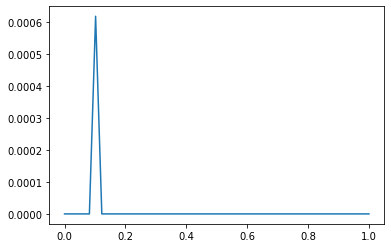

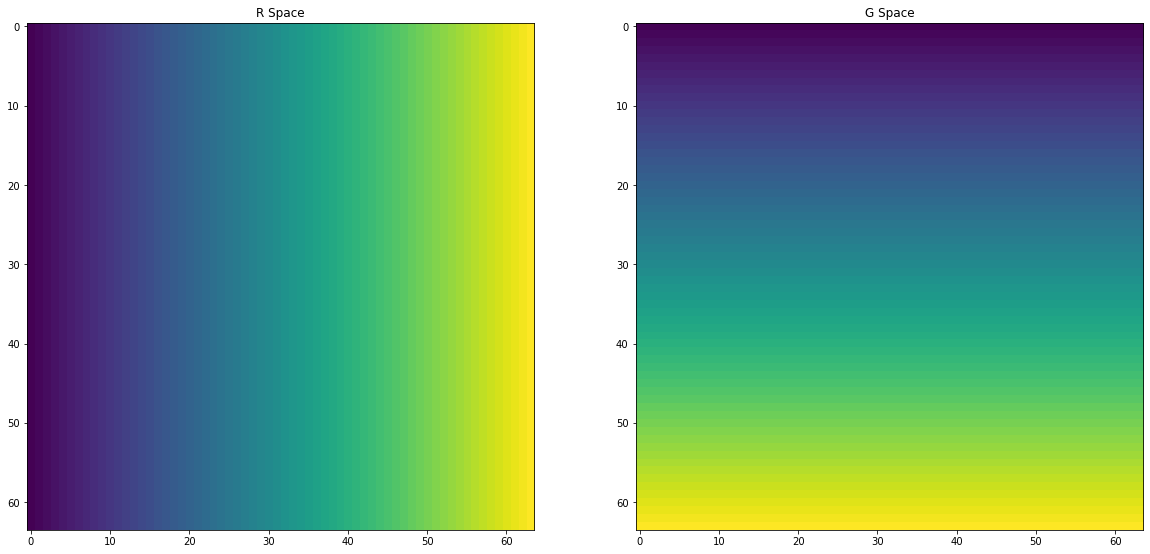

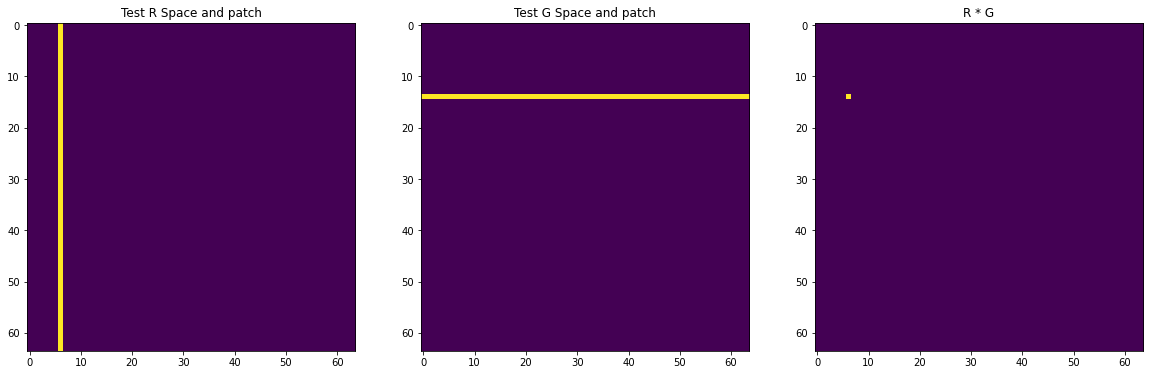

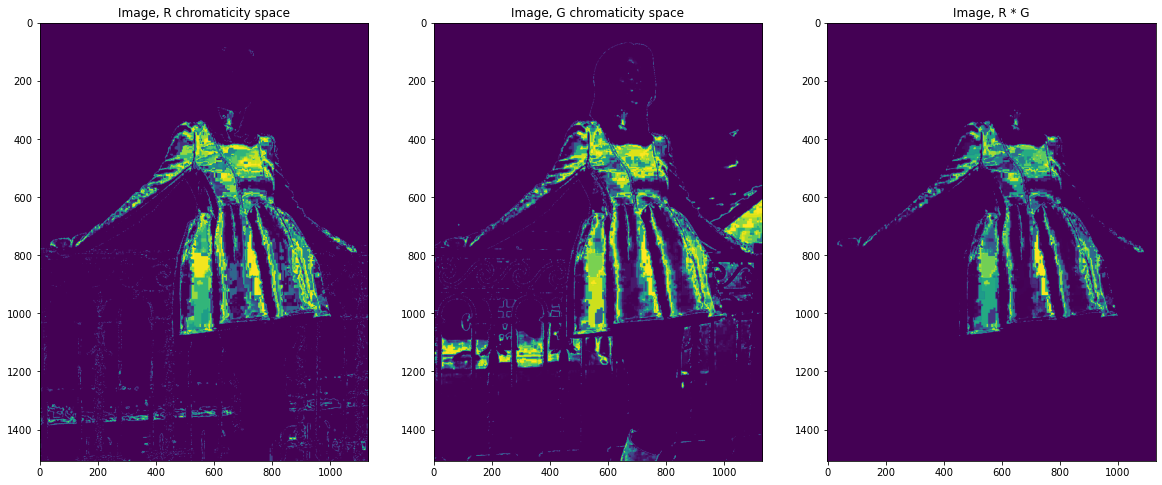

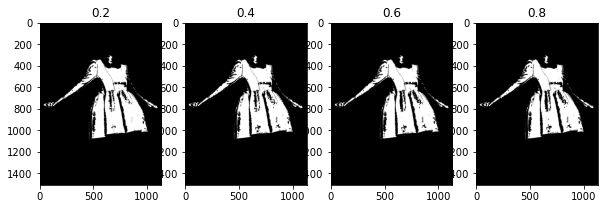

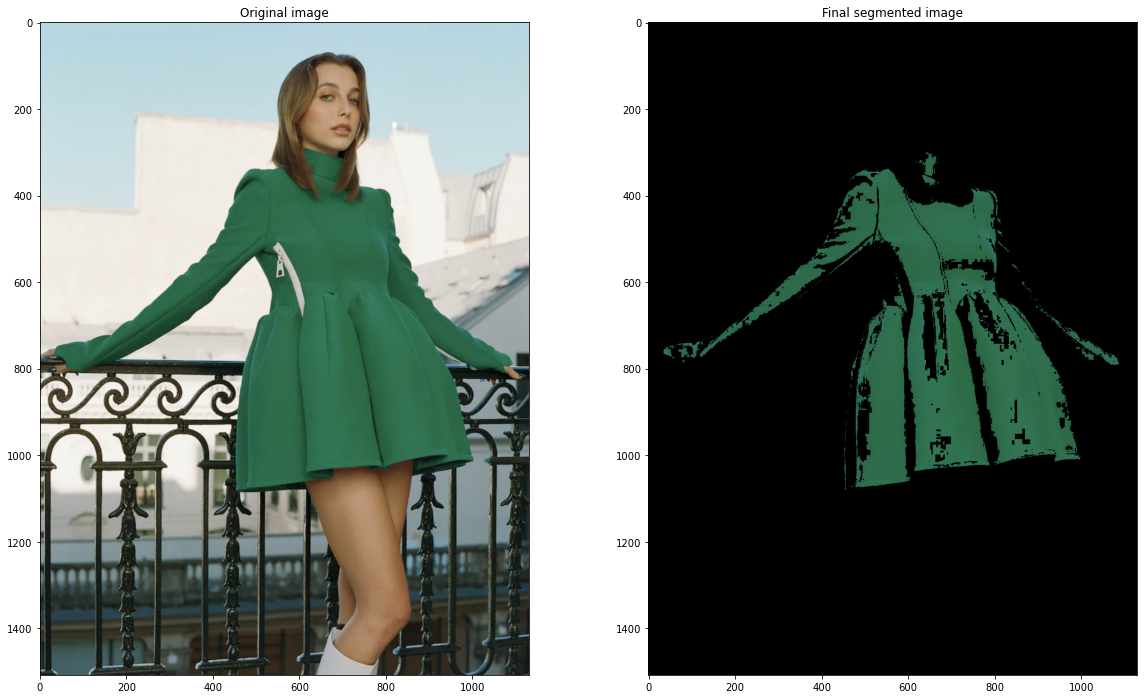

In [28]:
parametric_seg(image, patch)

Nonparametric segmentation

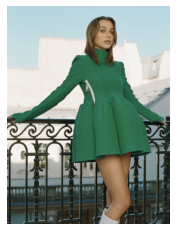

IndexError: index 139 is out of bounds for axis 0 with size 25

In [29]:
# Histogram and backprojection
def Hist_and_Backproj(val):
    bins = val
    histSize = max(bins, 2)
    ranges = [0, 180] # hue_range

    hist, _ = np.histogram(hue, bins=histSize, range=ranges)
    hist_norm = (hist - np.min(hist)) / (np.max(hist) - np.min(hist)) * 255
    
    backproj = (hist[hue.ravel()]/np.max(hist))*255
    backproj = backproj.reshape(hue.shape).astype(np.uint8)

    plt.figure(figsize=(6,6))
    plt.imshow(backproj, cmap='gray')
    plt.axis('off')
    plt.title('Backprojection')
    plt.show()

    plt.figure(figsize=(6,6))
    plt.bar(range(bins), hist, width=1.0, color='r')
    plt.xlim([0, bins])
    plt.title('Histogram')
    plt.show()

# Getting image and transforming to HSV
img = Image.open('Emma.png')
hsv = img.convert('HSV')
hue = np.array(hsv)[:, :, 0]

# Creating trackbar to change bin values
bins = 25

# Show image and allow user to close the program
plt.imshow(img)
plt.axis('off')
plt.show()

Hist_and_Backproj(bins)


In [33]:
import cv2 as cv
#histogram and backprojection
def Hist_and_Backproj(val):
    
    bins = val
    histSize = max(bins, 2)
    ranges = [0, 180] # hue_range
    
    
    hist = cv.calcHist([hue], [0], None, [histSize], ranges, accumulate=False)
    cv.normalize(hist, hist, alpha=0, beta=255, norm_type=cv.NORM_MINMAX)
    
    
    backproj = cv.calcBackProject([hue], [0], hist, ranges, scale=1)
    
    
    cv.imshow('BackProj', backproj)
    
    w = 400
    h = 400
    bin_w = int(round(w / histSize))
    histImg = np.zeros((h, w, 3), dtype=np.uint8)
    for i in range(bins):
        cv.rectangle(histImg, (i*bin_w, h), ( (i+1)*bin_w, h - int(np.round( hist[i]*h/255.0 )) ), (0, 0, 255), cv.FILLED)
    cv.imshow('Histogram', histImg)
#getting image and transforming to hsv
src = cv.imread('Emma.png')
hsv = cv.cvtColor(src, cv.COLOR_BGR2HSV)
ch = (0, 0)
hue = np.empty(hsv.shape, hsv.dtype)
#using only 1-D histogram (Hue)
cv.mixChannels([hsv], [hue], ch)
#creating trackbar to change bin values
window_image = 'Source image'
cv.namedWindow(window_image)
bins = 25
cv.createTrackbar('* Hue  bins: ', window_image, bins, 180, Hist_and_Backproj )
Hist_and_Backproj(bins)
#show image and allow user to close the program
cv.imshow(window_image, src)
cv.waitKey()

ModuleNotFoundError: No module named 'cv2'